<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [68]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [69]:
boston_df=pd.DataFrame(boston.data)

In [71]:
boston_df.columns=boston.feature_names

In [87]:
print('Data Shape: ', boston_df.shape)

Data Shape:  (506, 13)


In [88]:
print('Data Types: ')
print(boston_df.info())

Data Types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [89]:
print('Null values by column: ')
print(pd.isnull(boston_df).sum())

Null values by column: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [94]:
print('Basic summary statistics: ')
print(boston_df.describe())

Basic summary statistics: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


In [93]:
print('Unique values: ')
print(boston_df.nunique())

Unique values: 
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64


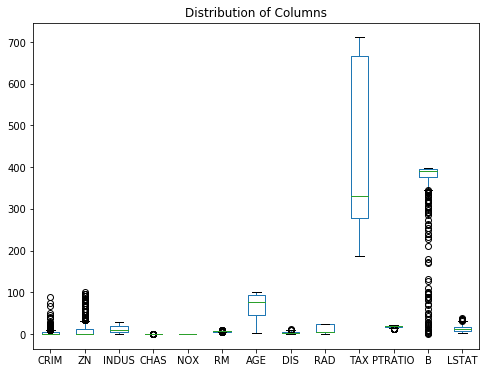

In [103]:
ax = boston_df.plot(kind='box', figsize=(8, 6), title = 'Distribution of Columns')

In [168]:
boston_df['MEDV']=boston.target

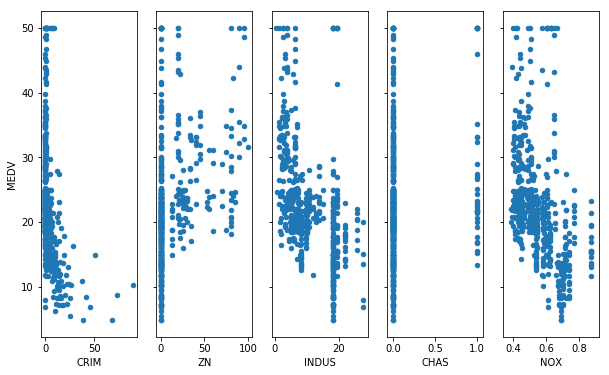

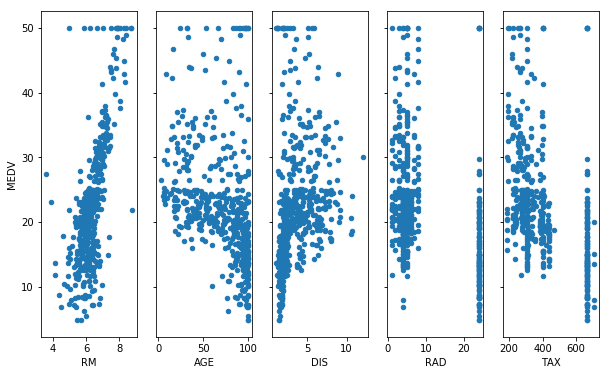

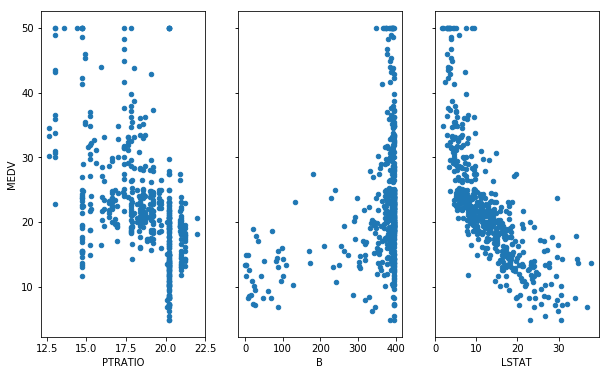

In [169]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, sharey=True, figsize=(10, 6))

boston_df.plot(kind='scatter', x='CRIM', y='MEDV', ax=ax0);
boston_df.plot(kind='scatter', x='ZN', y='MEDV', ax=ax1);
boston_df.plot(kind='scatter', x='INDUS', y='MEDV', ax=ax2);
boston_df.plot(kind='scatter', x='CHAS', y='MEDV', ax=ax3);
boston_df.plot(kind='scatter', x='NOX', y='MEDV', ax=ax4);

fig, (ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 5, sharey=True, figsize=(10, 6))

boston_df.plot(kind='scatter', x='RM', y='MEDV', ax=ax5);
boston_df.plot(kind='scatter', x='AGE', y='MEDV', ax=ax6);
boston_df.plot(kind='scatter', x='DIS', y='MEDV', ax=ax7);
boston_df.plot(kind='scatter', x='RAD', y='MEDV', ax=ax8);
boston_df.plot(kind='scatter', x='TAX', y='MEDV', ax=ax9);

fig, (ax10, ax11, ax12) = plt.subplots(1, 3, sharey=True, figsize=(10, 6))

boston_df.plot(kind='scatter', x='PTRATIO', y='MEDV', ax=ax10);
boston_df.plot(kind='scatter', x='B', y='MEDV', ax=ax11);
boston_df.plot(kind='scatter', x='LSTAT', y='MEDV', ax=ax12);

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [236]:
from sklearn import metrics

y_pred = np.zeros(y.shape[0]) + y.mean().values
metrics.mean_squared_error(y_pred, y)

84.41955615616554

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [239]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

print(metrics.mean_squared_error(train_pred, y_train))
print(metrics.mean_squared_error(test_pred, y_test))

21.055062680505237
25.94361238630562


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [237]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
linreg = LinearRegression()
-np.mean(cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))

23.809399548121856

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Model performed on the training set performed better than the null model, as evidenced by the lower MSE. The model performed on the training set likely has lower bias than the null model.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Thhe model performed better on the test set. It suggests there is variance in the model.

- How much of a bias problem does your model appear to have? Why do you say that?

I cannot say how much of a bias problem the model has, because I cannot compare it to anything that estimates the true model.

- How much of a variance problem does your model appear to have? Why do you say that?

Some of the mean square error can likely be explained by variance, but unsure how much. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

worse; 6 points of MSE (explanation below)

In [241]:
import seaborn as sns

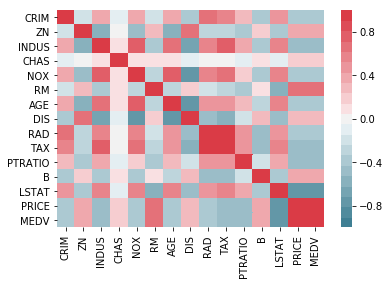

In [243]:
sns.heatmap(boston_df.corr(),
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(220,10,n=21),
            );

In [250]:
kf = KFold(n_splits=10, shuffle=True)
linreg = LinearRegression()
-np.mean(cross_val_score(linreg, X.drop('CHAS', axis='columns'), y, cv=kf, scoring='neg_mean_squared_error'))

23.879408318816374

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

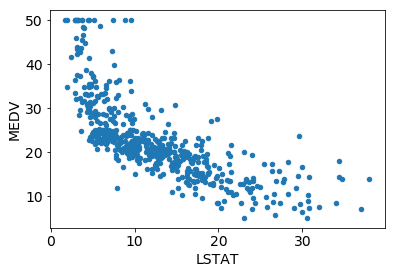

In [293]:
fig, ax = plt.subplots()
boston_df.plot(kind='scatter', x='LSTAT', y='MEDV', ax=ax);

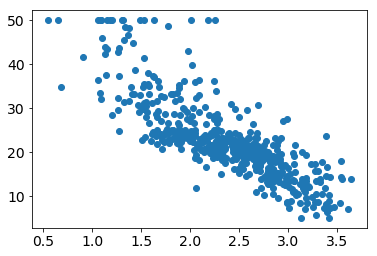

In [296]:
fig, ax = plt.subplots()
ax.scatter(np.log(boston_df.loc[:, 'LSTAT']), boston_df.loc[:, 'MEDV'])

# KNN Practice

In [251]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [252]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [253]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [254]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa': 0,
                                                         'Iris-versicolor': 1,
                                                         'Iris-virginica': 2,
                                                         })

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [255]:
iris.shape

(150, 6)

In [257]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [259]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [258]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [260]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
species_num      3
dtype: int64

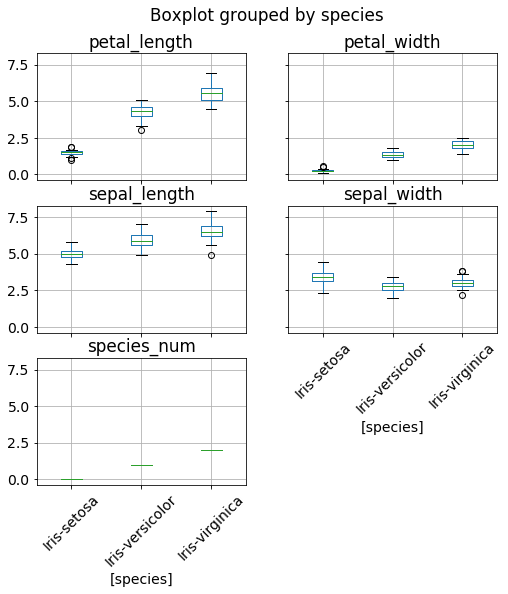

In [261]:
axes = iris.boxplot(by='species', figsize=(8,8), rot=45)

- Get the accuracy of a null model that simply predicts the most common species.

In [262]:
iris.loc[:,'species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [ ]:
### out of 150 total, the acccuracy of the null model is 33%.

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = iris.drop(['species', 'species_num'], axis='columns')
scaler.fit(X)
X_std = scaler.transform(X)

y = iris.loc[:, 'species_num']

train_scores = []
test_scores = []
for train_indices, test_indices in kf.split(X_std, y):
    X_train = X_std[train_indices, :]
    X_test = X_std[test_indices, :]
    y_train = y.loc[train_indices]
    y_test = y.loc[test_indices]
    
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [283]:
np.mean(train_scores)

0.9585185185185185

In [284]:
np.mean(test_scores)

0.9466666666666669

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed on the training set had an accuracy of 96%, which is higher than the null model's 33%. Based on the high accuracy, it likely does not have a lot of bias.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

My model on the test set performed better on the training set by about 2%. This tells me that the model has a slight variance.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model likely has minimal bias and variance problem based on accuracy closed to 100%. I cannot conclude which problem is greater since we don't know the accuracy of the true model.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [285]:
knn = KNeighborsClassifier(n_neighbors=10)

In [289]:
np.mean(cross_val_score(knn, X_std, y, cv=10)

SyntaxError: unexpected EOF while parsing (<ipython-input-289-e7975fe9757d>, line 1)

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [290]:
accuracy_scores = []
max_neighbors = int(np.ceil(.9*len(iris)))
for k in range(1, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_scores.append(np.mean(cross_val_score(knn, X_std, y, cv=10)))


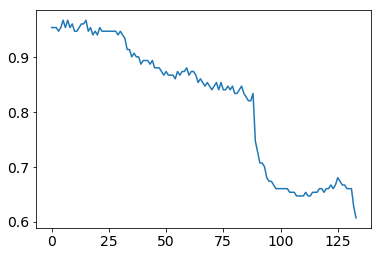

In [291]:
fig, ax = plt.subplots()
ax.plot(accuracy_scores)